# Going Deeper(NLP)

# 2. 뉴스 카테고리 다중분류

## Vocabulary Size (5000,10000, 모든단어) 를 변경해서 시도해보기  


* Writer :송영석
* Date : 2021.12.23

# 목차
    
    Step 1. 로이터 뉴스 데이터 확인   
        1) 데이터 로드
        2) 데이터 분포 확인해보기
        3) 원본 뉴스 데이터 복원
        4) 벡터화
        
    Step 2. 8가지의 머신러닝 모델들 적용 
        1) 머신러닝 모델들 가져오기
        2) Vocab_size에 따른 Accuracy
        
        
    Step 3. F1 Score 측정
        1) Classification Report 와 Confusion Matrix
        2) f1 score 란
    
    Step 4. 딥러닝(1-D CNN) 적용
        1) 데이터 로드 및 전처리
        2) 모델 학습 & 테스트
        3) 딥러닝 결과

    Step 5. 회고
        1) 전체 결과 정리
        2) 주의할 점들 정리

# step 1. 로이터 뉴스 데이터 확인

In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## 1) 데이터 로드
텐서플로우 데이터셋으로부터 로이터 뉴스 데이터를 받아옵니다.

In [5]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)
(x_train_n, y_train_n), (x_test_n, y_test_n) = reuters.load_data(num_words=None, test_split=0.2)

### !샘플의 수는 동일!
여기서 num_words의 개념을 한 번더 짚고 넘어가게 되었는데, 빈도수가 많은 순서대로 나열했을 때, num_words의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 <unk>로 처리하는 원리여서 가져오는 양은 같은데 나머지를 <unk>로 처리하냐 마냐의 차이였다.


In [6]:
print('훈련 샘플의 수(5000): {}'.format(len(x_train_5000)))
print('테스트 샘플의 수(5000): {}'.format(len(x_test_5000)))
print("=====================================")
print('훈련 샘플의 수(10000): {}'.format(len(x_train_10000)))
print('테스트 샘플의 수(10000): {}'.format(len(x_test_10000)))
print("=====================================")
print('훈련 샘플의 수(None): {}'.format(len(x_train_n)))
print('테스트 샘플의 수(None): {}'.format(len(x_test_n)))

훈련 샘플의 수(5000): 8982
테스트 샘플의 수(5000): 2246
훈련 샘플의 수(10000): 8982
테스트 샘플의 수(10000): 2246
훈련 샘플의 수(None): 8982
테스트 샘플의 수(None): 2246


### 데이터 출력해보기

In [7]:
print(x_train_n[0])
print(x_test_n[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [8]:
print(y_train_n[0])
print(y_test_n[0])

3
3


In [9]:
num_classes = max(y_train_n) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


## 2) 데이터 분포 확인해보기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


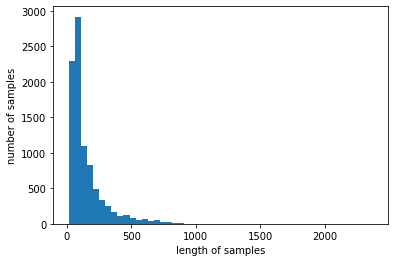

In [12]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_n)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_n))/len(x_train_n)))

plt.hist([len(s) for s in x_train_n], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

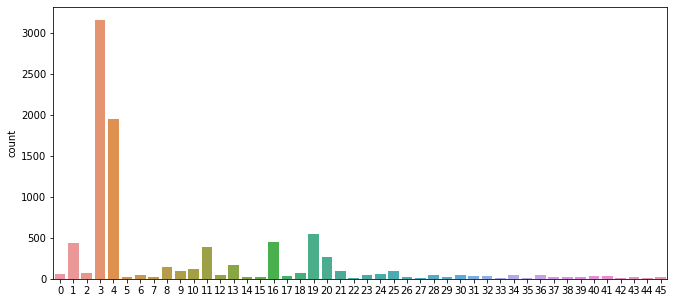

In [13]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_n)
plt.show()

In [14]:
unique_elements, counts_elements = np.unique(y_train_n, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 3) 원본 뉴스 데이터 복원

In [15]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

557056/550378 [==============================] - 0s 0us/step


In [16]:
word_index['the']

1

In [17]:
word_index['it']

13

In [18]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print(index_to_word[4])
print(index_to_word[16])

the
it


In [19]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
print(' '.join([index_to_word[index] for index in x_train_n[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [20]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed


In [21]:
def data_decode(x_train,x_test):
    decoded = []
    for i in range(len(x_train)):
        t = ' '.join([index_to_word[index] for index in x_train[i]])
        decoded.append(t)

    x_train = decoded


    decoded = []
    for i in range(len(x_test)):
        t = ' '.join([index_to_word[index] for index in x_test[i]])
        decoded.append(t)
    x_test = decoded
    print(len(x_train))
    print(len(x_test))
    print("===================")
    
    return x_train,x_test
 

In [22]:
x_train_5000,x_test_5000 = data_decode(x_train_5000,x_test_5000)
x_train_10000,x_test_10000 = data_decode(x_train_10000,x_test_10000)
x_train_n,x_test_n = data_decode(x_train_n,x_test_n)

8982
2246
8982
2246
8982
2246


### 데이터 출력
train data를 보면 위에서 부터 전체단어, 빈도수 높은 10000단어, 5000단어를 사용한 출력값인데, 그래서 밑으로 갈수록 <unk>가 늘어나는 것을 알 수 있습니다.

In [139]:
x_train_n[4]

'<sos> seton co said its board has received a proposal from chairman and chief executive officer philip d kaltenbacher to acquire seton for 15 75 dlrs per share in cash seton said the acquisition bid is subject to kaltenbacher arranging the necessary financing it said he intends to ask other members of senior management to participate the company said kaltenbacher owns 30 pct of seton stock and other management members another 7 5 pct seton said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3'

In [137]:
x_train_10000[4]

'<sos> seton co said its board has received a proposal from chairman and chief executive officer philip d <unk> to acquire seton for 15 75 dlrs per share in cash seton said the acquisition bid is subject to <unk> arranging the necessary financing it said he intends to ask other members of senior management to participate the company said <unk> owns 30 pct of seton stock and other management members another 7 5 pct seton said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3'

In [138]:
x_train_5000[4]

'<sos> <unk> co said its board has received a proposal from chairman and chief executive officer philip d <unk> to acquire <unk> for 15 75 dlrs per share in cash <unk> said the acquisition bid is subject to <unk> arranging the necessary financing it said he intends to ask other members of senior management to participate the company said <unk> owns 30 pct of <unk> stock and other management members another 7 5 pct <unk> said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3'

## 4) 벡터화

### !fit_ transform 문제!
tfidf_transformer를 사용하고 test 데이터 역시 변형해줘야한다는 점에서 한번 실수를 하였는데 이후에 또 동작이 잘 안되어서 어려움을 겪었다. 살펴보니 fit_transform을 통해 전체단어 transformer,10000단어 transformer, 5000 transformer를 각각 만들어 주지 않아서 그런 것이었지만 여기선 transformer 학습 후 바로 test를 변형하는 것으로 해결하였다.

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


dtmvector = CountVectorizer()
tfidf_transformer = TfidfTransformer()
print("===========  Shape of matrix  ========== ")
print("========================================")
x_train_dtm_n = dtmvector.fit_transform(x_train_n)
print("Whole words of train : " ,x_train_dtm_n.shape)
tfidfv_n = tfidf_transformer.fit_transform(x_train_dtm_n)
print("Whole words of train: " , tfidfv_n.shape)
x_test_dtm_n = dtmvector.transform(x_test_n) #테스트 데이터를 DTM으로 변환
tfidfv_test_n = tfidf_transformer.transform(x_test_dtm_n) #DTM을 TF-IDF 행렬로 변환
print("Whole words of test: " ,x_test_dtm_n.shape)
print("Whole words of test: " , tfidfv_test_n.shape)
print("========================================")
x_train_dtm_10000 = dtmvector.fit_transform(x_train_10000)
print("10000 words of train: ", x_train_dtm_10000.shape)
tfidfv_10000 = tfidf_transformer.fit_transform(x_train_dtm_10000)
print("10000 words of train: " ,tfidfv_10000.shape)
x_test_dtm_10000 = dtmvector.transform(x_test_10000) 
tfidfv_test_10000 = tfidf_transformer.transform(x_test_dtm_10000) 
print("10000 words of test: " ,x_test_dtm_10000.shape)
print("10000 words of test: " , tfidfv_test_10000.shape)
print("========================================")
x_train_dtm_5000 = dtmvector.fit_transform(x_train_5000)
print("5000 words of train: " ,x_train_dtm_5000.shape)
tfidfv_5000 = tfidf_transformer.fit_transform(x_train_dtm_5000)
print("5000 words of train: " , tfidfv_5000.shape)
x_test_dtm_5000 = dtmvector.transform(x_test_5000) 
tfidfv_test_5000 = tfidf_transformer.transform(x_test_dtm_5000)
print("5000 words of test: " ,x_test_dtm_5000.shape)
print("5000 words of test: " , tfidfv_test_5000.shape)


===========  Shape of matrix  ========== 
Whole words of train :  (8982, 26506)
Whole words of train:  (8982, 26506)
Whole words of test:  (2246, 26506)
Whole words of test:  (2246, 26506)
10000 words of train:  (8982, 9670)
10000 words of train:  (8982, 9670)
10000 words of test:  (2246, 9670)
10000 words of test:  (2246, 9670)
5000 words of train:  (8982, 4867)
5000 words of train:  (8982, 4867)
5000 words of test:  (2246, 4867)
5000 words of test:  (2246, 4867)


# step 2. 8가지의 머신러닝 모델들 적용 

In [152]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

## 1) 머신러닝 모델들 가져오기

In [153]:
def ml_models(tfidfv,y_train,tfidfv_test,y_test):
    mn = MultinomialNB() # 나이브 베이즈 분류기
    mn.fit(tfidfv, y_train)

    mn_predicted = mn.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("나이브베이즈의 정확도:", accuracy_score(y_test, mn_predicted)) #예측값과 실제값 비교
    
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("컴플리먼트 나이즈 베이즈의 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)

    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("로지스틱 회귀의 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)

    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("선형 서포트 벡터 머신의 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)

    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("Tree의 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)

    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("forest의 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    '''
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv, y_train)
    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("grbt의 정확도:", accuracy_score(y_test, grbi_predicted)) #예측값과 실제값 비교

    voting_classifier = VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, penalty='l2')),
                                                     ('cb', ComplementNB()),('grbt', GradientBoostingClassifier(random_state=0))],
                                         voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)

    voting_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("voting_classifier의 정확도:", accuracy_score(y_test, voting_predicted)) #예측값과 실제값 비교
'''
    return mn,cb,lr,lsvc,tree,forest

## 2) Vocab_size에 따른 Accuracy

In [177]:
import warnings
warnings.filterwarnings('ignore')

print ( "========== ML of whole words==========")
mn_n,cb_n,lr_n,lsvc_n,tree_n,forest_n=ml_models(tfidfv_n,y_train_n,tfidfv_test_n,y_test_n)
print ( "========== ML of 10000 words==========")
mn_10000,cb_10000,lr_10000,lsvc_10000,tree_10000,forest_10000=ml_models(tfidfv_10000,y_train_10000,tfidfv_test_10000,y_test_10000)
print ( "========== ML of 5000 words==========")
mn_5000,cb_5000,lr_5000,lsvc_5000,tree_5000,forest_5000=ml_models(tfidfv_5000,y_train_5000,tfidfv_test_5000,y_test_5000)

========== ML of whole words==========
나이브베이즈의 정확도: 0.5997328584149599
컴플리먼트 나이즈 베이즈의 정확도: 0.7649154051647373
로지스틱 회귀의 정확도: 0.813446126447017
선형 서포트 벡터 머신의 정확도: 0.784060552092609
Tree의 정확도: 0.6211041852181657
forest의 정확도: 0.6544968833481746
========== ML of 10000 words==========
나이브베이즈의 정확도: 0.6567230632235085
컴플리먼트 나이즈 베이즈의 정확도: 0.7707034728406055
로지스틱 회귀의 정확도: 0.8076580587711487
선형 서포트 벡터 머신의 정확도: 0.7742653606411398
Tree의 정확도: 0.6202137132680321
forest의 정확도: 0.674087266251113
========== ML of 5000 words==========
나이브베이즈의 정확도: 0.6731967943009796
컴플리먼트 나이즈 베이즈의 정확도: 0.7707034728406055
로지스틱 회귀의 정확도: 0.8058771148708815
선형 서포트 벡터 머신의 정확도: 0.767586821015138
Tree의 정확도: 0.6179875333926982
forest의 정확도: 0.701246660730187


### Gradient boosting
#### 특징
부스팅 계열의 대부분 computational cost는 각 단계에서 약한 학습자인 최적의 tree를 찾는데 쓰인다. 따라서 백만 개의 데이터를 Boosting으로 iteration=1000을 학습시킨 경우, 각 단계에서 tree를 fit하기위해 백만개 데이터를 전부 확인해야 한다. 해당 과정을 1000번 반복하니 computational cost가 너무 많이 들고 시간이 오래 걸린다.  
Gradient boosting은 모델 학습 시간도 측정하기 위해 위의 함수안에 정의하지 않고 따로 학습하였다.

In [156]:
import time 
print ( "========== ML of whole words==========")
start_time = time.time()
grbt_n = GradientBoostingClassifier(random_state=0) # verbose=3
grbt_n.fit(tfidfv_n, y_train_n)
grbt_predicted_n = grbt_n.predict(tfidfv_test_n) #테스트 데이터에 대한 예측
print("grbt의 정확도:", accuracy_score(y_test_n, grbt_predicted_n)) #예측값과 실제값 비교
print('GBM 수행 시간 :{:.1f}초'.format(time.time() - start_time))
print ( "========== ML of 10000 words==========")
start_time = time.time()
grbt_10000 = GradientBoostingClassifier(random_state=0) # verbose=3
grbt_10000.fit(tfidfv_10000, y_train_10000)
grbt_predicted_10000 = grbt_10000.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("grbt의 정확도:", accuracy_score(y_test_10000, grbt_predicted_10000)) #예측값과 실제값 비교
print('GBM 수행 시간 :{:.1f}초'.format(time.time() - start_time))
print ( "========== ML of 5000 words==========")
start_time = time.time()
grbt_5000 = GradientBoostingClassifier(random_state=0) # verbose=3
grbt_5000.fit(tfidfv_5000, y_train_5000)
grbt_predicted_5000 = grbt_5000.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("grbt의 정확도:", accuracy_score(y_test_5000, grbt_predicted_5000)) #예측값과 실제값 비교
print('GBM 수행 시간 :{:.1f}초'.format(time.time() - start_time))

========== ML of whole words==========
grbt의 정확도: 0.7702582368655387
GBM 수행 시간 :1206.5초
========== ML of 10000 words==========
grbt의 정확도: 0.7666963490650045
GBM 수행 시간 :1109.1초
========== ML of 5000 words==========
grbt의 정확도: 0.767586821015138
GBM 수행 시간 :1054.1초


### voting_classifier
#### 특징
Hard voting은 다수의 classifier의 예측 결과값을 다수결로 최종 class를 결정하고,soft voting은 다수의 classifier의 예측 결과값간 확률을 평균하여 최종 class를 결정한다. 여기서는 soft를 사용하여 예측 성능을 높여보고자 하였다.  
voting classifier 역시 내부에 Gradient boosting을 사용하기에 시간이 오래걸릴것으로 보고 함수내에 정의하지 않고 따로 확인하였다.

In [157]:
print ( "========== ML of whole words==========")
start_time = time.time()
voting_classifier_n = VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, penalty='l2')),('cb', ComplementNB()),('grbt', GradientBoostingClassifier(random_state=0))],
                                     voting='soft', n_jobs=-1)
voting_classifier_n.fit(tfidfv_n, y_train_n)

voting_predicted_n = voting_classifier_n.predict(tfidfv_test_n) #테스트 데이터에 대한 예측
print("voting_classifier의 정확도:", accuracy_score(y_test_n, voting_predicted_n)) #예측값과 실제값 비교
print('voting의 수행 시간 :{:.1f}초'.format(time.time() - start_time))
print ( "========== ML of 10000 words==========")
start_time = time.time()
voting_classifier_10000 = VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, penalty='l2')),('cb', ComplementNB()),('grbt', GradientBoostingClassifier(random_state=0))],
                                     voting='soft', n_jobs=-1)
voting_classifier_10000.fit(tfidfv_10000, y_train_10000)

voting_predicted_10000 = voting_classifier_10000.predict(tfidfv_test_10000) #테스트 데이터에 대한 예측
print("voting_classifier의 정확도:", accuracy_score(y_test_10000, voting_predicted_10000)) #예측값과 실제값 비교
print('voting의 수행 시간 :{:.1f}초'.format(time.time() - start_time))

print ( "========== ML of 5000 words==========")
start_time = time.time()
voting_classifier_5000 = VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, penalty='l2')),('cb', ComplementNB()),('grbt', GradientBoostingClassifier(random_state=0))],
                                     voting='soft', n_jobs=-1)
voting_classifier_5000.fit(tfidfv_5000, y_train_5000)

voting_predicted_5000 = voting_classifier_5000.predict(tfidfv_test_5000) #테스트 데이터에 대한 예측
print("voting_classifier의 정확도:", accuracy_score(y_test_5000, voting_predicted_5000)) #예측값과 실제값 비교
print('voting의 수행 시간 :{:.1f}초'.format(time.time() - start_time))

========== ML of whole words==========
voting_classifier의 정확도: 0.8187889581478184
voting의 수행 시간 :1227.0초
========== ML of 10000 words==========
voting_classifier의 정확도: 0.8116651825467498
voting의 수행 시간 :1116.6초
========== ML of 5000 words==========
voting_classifier의 정확도: 0.8161175422974176
voting의 수행 시간 :1045.8초


### Accuracy of ML models  
머신러닝 8가지 모델의 수행결과 accuracy는 모두 voting classifier가 모든 vocab_size에서 우수하였고, 로지스틱 회귀 역시 비슷하게 좋았습니다.   
그 뒤로 Gradient boosting, SVM, CNB 등이 비교적 괜찮은 성능을 보였습니다.


||Whole words|10000 words|5000 words|
|------|---|---|---|
|Multinomial NB|0.60 |0.65|0.67
|ComplementNB|0.76|0.77|0.77
|LogisticRegression|0.813|0.807|0.805
| LinearSVC|0.78|0.77|0.77
|DecisionTree|0.62|0.62|0.62
|RandomForest|0.65|0.67|0.70
|GradientBoosting|0.770|0.766|0.766
|VotingClassifier|**0.818**|**0.811**|**0.816**


# step 3. F1 Score 측정

In [158]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## 1) Classification Report 와 Confusion Matrix
사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공합니다.  
이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가

### Voting_classifier의 classification_report

In [159]:
print(classification_report(y_test_n, voting_classifier_n.predict(tfidfv_test_n), zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
          17       0.75    

In [160]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

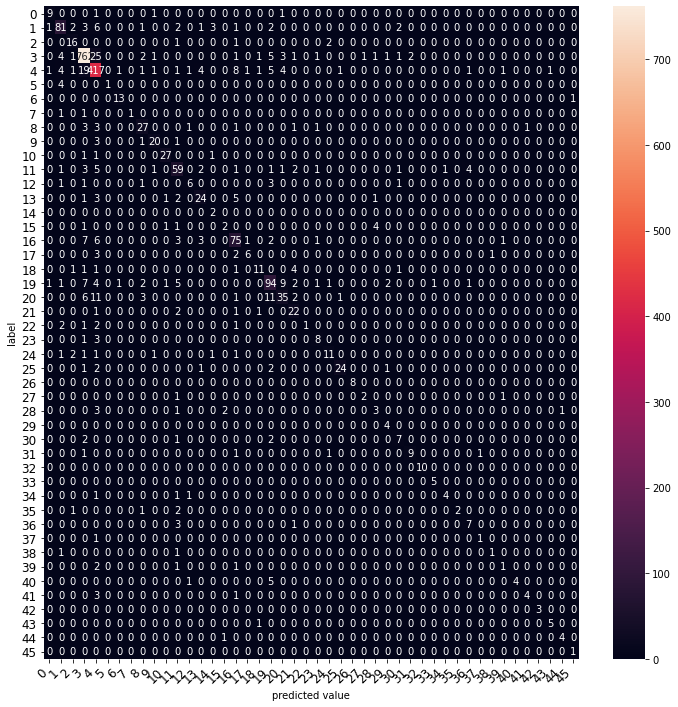

In [162]:
graph_confusion_matrix(voting_classifier_n, tfidfv_test_n, y_test_n)

## 2) f1 score 란
F1 score는 Precision과 Recall의 조화평균입니다.  
F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현할 수 있습니다. 

### 이 중 사용할 f1 score는?
Micro : 평균을 계산할 때 각 클래스의 샘플 수를 고려하여 평균을 취하는 방식이다.  

Macro : 각 클래스의 샘플 수에 상관없이 평균을 취하는 방식입니다.  

Weighted : 각 클래스에 대한 f1-score를 계산한 뒤 각 클래스 별 데이터 비율에 따른 가중 평균을 내어 f1-score를 계산합니다.

정리하면 Micro는 클래스의 불균형 등에 민감하게 반응할 수 있는 평가지표이고 Macro는 모델의 전반적인 성능에 대해 평가할 수 있는 지표입니다.  
따라서,이번 프로젝트에서는 최종 표 작성에 **micro**를 사용하겠습니다.

In [178]:
def get_score(model,tfidfv_test, y_test):
    print("=========================================================")
    print("f1 socre of ",model)
    print("\n")
    print("f1_score(macro) : ",f1_score(y_test, model.predict(tfidfv_test), average='macro'))
    print("f1_score(micro) : ",f1_score(y_test, model.predict(tfidfv_test), average='micro'))
    print("f1_score(weighted) : ",f1_score(y_test, model.predict(tfidfv_test), average='weighted'))    

In [179]:
def models_get_score_n(tfidfv_test,y_test):
    get_score(mn_n, tfidfv_test, y_test)
    get_score(cb_n, tfidfv_test, y_test)
    get_score(lr_n, tfidfv_test, y_test)
    get_score(lsvc_n, tfidfv_test, y_test)
    get_score(tree_n, tfidfv_test, y_test)
    get_score(forest_n, tfidfv_test, y_test)
    get_score(grbt_n, tfidfv_test, y_test)
    get_score(voting_classifier_n, tfidfv_test, y_test)    

In [180]:
def models_get_score_10000(tfidfv_test,y_test):
    get_score(mn_10000, tfidfv_test, y_test)
    get_score(cb_10000, tfidfv_test, y_test)
    get_score(lr_10000, tfidfv_test, y_test)
    get_score(lsvc_10000, tfidfv_test, y_test)
    get_score(tree_10000, tfidfv_test, y_test)
    get_score(forest_10000, tfidfv_test, y_test)
    get_score(grbt_10000, tfidfv_test, y_test)
    get_score(voting_classifier_10000, tfidfv_test, y_test)    

In [181]:
def models_get_score_5000(tfidfv_test,y_test):
    get_score(mn_5000, tfidfv_test, y_test)
    get_score(cb_5000, tfidfv_test, y_test)
    get_score(lr_5000, tfidfv_test, y_test)
    get_score(lsvc_5000, tfidfv_test, y_test)
    get_score(tree_5000, tfidfv_test, y_test)
    get_score(forest_5000, tfidfv_test, y_test)
    get_score(grbt_5000, tfidfv_test, y_test)
    get_score(voting_classifier_5000, tfidfv_test, y_test)    

### Whole words

In [182]:
models_get_score_n(tfidfv_test_n,y_test_n)

f1 socre of  MultinomialNB()


f1_score(macro) :  0.06767886443611608
f1_score(micro) :  0.5997328584149599
f1_score(weighted) :  0.5045670886188423
f1 socre of  ComplementNB()


f1_score(macro) :  0.4639854358945848
f1_score(micro) :  0.7649154051647373
f1_score(weighted) :  0.7346534179503126
f1 socre of  LogisticRegression(C=10000)


f1_score(macro) :  0.669532685925375
f1_score(micro) :  0.813446126447017
f1_score(weighted) :  0.8079349566211766
f1 socre of  LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')


f1_score(macro) :  0.5960600615754225
f1_score(micro) :  0.7840605520926089
f1_score(weighted) :  0.7768064901785215
f1 socre of  DecisionTreeClassifier(max_depth=10, random_state=0)


f1_score(macro) :  0.15450055404800783
f1_score(micro) :  0.6211041852181657
f1_score(weighted) :  0.5769283128518846
f1 socre of  RandomForestClassifier(n_estimators=5, random_state=0)


f1_score(macro) :  0.2794631711818573
f1_score(micro) :  0.6544968833481746
f1_score(weighted) :  0.

### 10000 words

In [184]:
models_get_score_10000(tfidfv_test_10000,y_test_10000)

f1 socre of  MultinomialNB()


f1_score(macro) :  0.09672807335440754
f1_score(micro) :  0.6567230632235085
f1_score(weighted) :  0.5764467518778252
f1 socre of  ComplementNB()


f1_score(macro) :  0.47835757543524193
f1_score(micro) :  0.7707034728406055
f1_score(weighted) :  0.7456682614453047
f1 socre of  LogisticRegression(C=10000)


f1_score(macro) :  0.6425870381948257
f1_score(micro) :  0.8076580587711487
f1_score(weighted) :  0.8014651882605348
f1 socre of  LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')


f1_score(macro) :  0.6090095922819593
f1_score(micro) :  0.7742653606411398
f1_score(weighted) :  0.7697631549372804
f1 socre of  DecisionTreeClassifier(max_depth=10, random_state=0)


f1_score(macro) :  0.1840533373860316
f1_score(micro) :  0.6202137132680321
f1_score(weighted) :  0.5776398779280149
f1 socre of  RandomForestClassifier(n_estimators=5, random_state=0)


f1_score(macro) :  0.30931816900485903
f1_score(micro) :  0.674087266251113
f1_score(weighted) :  

### 5000 words

In [185]:
models_get_score_5000(tfidfv_test_5000,y_test_5000)

f1 socre of  MultinomialNB()


f1_score(macro) :  0.11017286132336847
f1_score(micro) :  0.6731967943009796
f1_score(weighted) :  0.6012501291711391
f1 socre of  ComplementNB()


f1_score(macro) :  0.48203488372044917
f1_score(micro) :  0.7707034728406055
f1_score(weighted) :  0.7458990404916549
f1 socre of  LogisticRegression(C=10000)


f1_score(macro) :  0.6427529674429183
f1_score(micro) :  0.8058771148708815
f1_score(weighted) :  0.7994583667437475
f1 socre of  LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')


f1_score(macro) :  0.5809650285468163
f1_score(micro) :  0.767586821015138
f1_score(weighted) :  0.7629206373635372
f1 socre of  DecisionTreeClassifier(max_depth=10, random_state=0)


f1_score(macro) :  0.17794649395239356
f1_score(micro) :  0.6179875333926982
f1_score(weighted) :  0.5729970881280324
f1 socre of  RandomForestClassifier(n_estimators=5, random_state=0)


f1_score(macro) :  0.35960899933378104
f1_score(micro) :  0.701246660730187
f1_score(weighted) :  

## F1 - Score

F1 - score를 계산 한 결과로 average = micro 설정한 값만을 표로 나타내었습니다. 클래스간 불균형이 있는 데이터여서 micro를 사용하였고, Voting classifier가 가장 우수하고 로지스틱 회귀가 그와 비슷하며 그 뒤를 이어 SVC, GB ,CNB 등이 우수하였습니다.

||Whole words|10000 words|5000 words|
|------|---|---|---|
|Multinomial NB|0.599|0.656|0.673
|ComplementNB|0.764|0.770|0.770
|LogisticRegression|0.813|0.807|0.805
| LinearSVC|0.784|0.774|0.767
|DecisionTree|0.621|0.620|0.617  
|RandomForest|0.654|0.674|0.701
|GradientBoosting|0.770|0.766|0.767
|VotingClassifier|**0.818**|**0.811**|**0.816**


# step 4. 딥러닝(1-D CNN) 적용

## 1) 데이터 로드 및 전처리

In [25]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)
(x_train_n, y_train_n), (x_test_n, y_test_n) = reuters.load_data(num_words=None, test_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [26]:
word_to_index = { word : index for index, word in index_to_word.items() }
maxlen=max(len(l) for l in x_train_n)
print("최대길이 : ",maxlen)
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_n))/len(x_train_n)))


최대길이 :  2376
훈련용 뉴스의 평균 길이 :145.5398574927633


### padding
데이터들을 각각 최대길이 500 정도로 지정하고 'pre' 로 padding 해주었다.

In [32]:
import tensorflow as tf  
from tensorflow import keras 
maxlen = 500
x_train_n = keras.preprocessing.sequence.pad_sequences(x_train_n,
                                                        value=word_to_index["<pad>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
x_test_n = keras.preprocessing.sequence.pad_sequences(x_test_n,
                                                       value=word_to_index["<pad>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)
y_train_n = tf.one_hot(y_train_n, depth=46)
y_test_n = tf.one_hot(y_test_n, depth=46)

print("Original x_train shape : ",x_train_n.shape)
print("Original y_train shape : ",y_train_n.shape)
# validation set 1000건 분리
x_val_n = x_train_n[:1000]   
y_val_n = y_train_n[:1000]
# validation set을 제외한 나머지 
partial_x_train_n= x_train_n[1000:]  
partial_y_train_n = y_train_n[1000:]
print("Partial x_train shape : " ,partial_x_train_n.shape)
print("Partial y_train shape : " ,partial_y_train_n.shape)

Original x_train shape :  (8982, 500)
Original y_train shape :  (8982, 46)
Partial x_train shape :  (7982, 500)
Partial y_train shape :  (7982, 46)


In [28]:
x_train_10000 = keras.preprocessing.sequence.pad_sequences(x_train_10000,
                                                        value=word_to_index["<pad>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
x_test_10000 = keras.preprocessing.sequence.pad_sequences(x_test_10000,
                                                       value=word_to_index["<pad>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)
y_train_10000 = tf.one_hot(y_train_10000, depth=46)
y_test_10000 = tf.one_hot(y_test_10000, depth=46)

print("Original x_train shape : ",x_train_10000.shape)
print("Original y_train shape : ",y_train_10000.shape)
# validation set 1000건 분리
x_val_10000 = x_train_10000[:1000]   
y_val_10000 = y_train_10000[:1000]
# validation set을 제외한 나머지 
partial_x_train_10000= x_train_10000[1000:]  
partial_y_train_10000 = y_train_10000[1000:]
print("Partial x_train shape : " ,partial_x_train_10000.shape)
print("Partial y_train shape : " ,partial_y_train_10000.shape)

Original x_train shape :  (8982, 500)
Original y_train shape :  (8982, 46)
Partial x_train shape :  (7982, 500)
Partial y_train shape :  (7982, 46)


In [29]:
x_train_5000= keras.preprocessing.sequence.pad_sequences(x_train_5000,
                                                        value=word_to_index["<pad>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
x_test_5000 = keras.preprocessing.sequence.pad_sequences(x_test_5000,
                                                       value=word_to_index["<pad>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)
y_train_5000 = tf.one_hot(y_train_5000, depth=46)
y_test_5000 = tf.one_hot(y_test_5000, depth=46)

print("Original x_train shape : ",x_train_5000.shape)
print("Original y_train shape : ",y_train_5000.shape)
# validation set 1000건 분리
x_val_5000 = x_train_5000[:1000]   
y_val_5000 = y_train_5000[:1000]
# validation set을 제외한 나머지 
partial_x_train_5000= x_train_5000[1000:]  
partial_y_train_5000 = y_train_5000[1000:]
print("Partial x_train shape : " ,partial_x_train_5000.shape)
print("Partial y_train shape : " ,partial_y_train_5000.shape)

Original x_train shape :  (8982, 500)
Original y_train shape :  (8982, 46)
Partial x_train shape :  (7982, 500)
Partial y_train shape :  (7982, 46)


## 2) 모델 학습 & 테스트

In [30]:
# 모든 vocab_size를 구하기 위함
print(x_train_n.max()+1)
print(x_test_n.max()+1)

30982
30970


### f1-score
f1-score를 딥러닝 compile 과정에서 구하기 위해 f1_m 함수를 정의 해줍니다. f1-score는 recall과 precision의 조화평균값이므로 두 가지 경우 역시 함수를 정의해줍니다.

In [200]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 1-D CNN
1-D CNN 모델을 생성해줍니다. 클래스가 46가지 이므로 마지막 Dense 값에 46을 주고, 여러 카테고리가 있으므로 categorical_crossentropy를 loss로 사용한 모델을 만들었습니다.

In [201]:
def dnn_vocab(vocab_size):
    word_vector_dim =128 # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경가능)
    model_cnn = keras.Sequential()
    model_cnn.add(keras.layers.Embedding(vocab_size,word_vector_dim, input_shape=(None,)))
    model_cnn.add(keras.layers.Conv1D(256, 32, activation='relu'))
    model_cnn.add(keras.layers.MaxPooling1D(5))
    model_cnn.add(keras.layers.Conv1D(256, 32, activation='relu'))
    model_cnn.add(keras.layers.GlobalMaxPooling1D())
    model_cnn.add(keras.layers.Dense(64, activation='relu'))
    model_cnn.add(keras.layers.Dense(46, activation='softmax'))  

    model_cnn.summary()
    model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',f1_m])
            
    return model_cnn

전체 단어, 10000개,5000개의 단어를 각각 사용하는 1-D CNN모델을 생성합니다.

In [202]:
dnn_n = dnn_vocab(30982)
dnn_10000 = dnn_vocab(10000)
dnn_5000 = dnn_vocab(5000)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         3965696   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 256)         1048832   
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 256)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 256)         2097408   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 46)               

In [203]:
epochs=20 # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 
history_dnn_n = dnn_n.fit(partial_x_train_n,partial_y_train_n,epochs=epochs,batch_size=512,validation_data=(x_val_n, y_val_n),verbose=1)
results_n = dnn_n.evaluate(x_test_n,  y_test_n, verbose=2)
print(results_n)

Epoch 1/20
16/16 [==============================] - 28s 1s/step - loss: 3.0465 - accuracy: 0.2668 - f1_m: 0.0702 - val_loss: 2.2336 - val_accuracy: 0.4350 - val_f1_m: 0.3062
Epoch 2/20
16/16 [==============================] - 10s 634ms/step - loss: 2.1537 - accuracy: 0.4684 - f1_m: 0.3560 - val_loss: 1.8698 - val_accuracy: 0.5700 - val_f1_m: 0.4667
Epoch 3/20
16/16 [==============================] - 10s 645ms/step - loss: 1.7135 - accuracy: 0.5932 - f1_m: 0.5477 - val_loss: 1.5160 - val_accuracy: 0.6200 - val_f1_m: 0.6712
Epoch 4/20
16/16 [==============================] - 10s 632ms/step - loss: 1.4067 - accuracy: 0.6591 - f1_m: 0.7054 - val_loss: 1.4178 - val_accuracy: 0.6610 - val_f1_m: 0.6815
Epoch 5/20
16/16 [==============================] - 10s 631ms/step - loss: 1.1740 - accuracy: 0.7108 - f1_m: 0.7441 - val_loss: 1.3925 - val_accuracy: 0.6690 - val_f1_m: 0.6974
Epoch 6/20
16/16 [==============================] - 10s 633ms/step - loss: 0.9965 - accuracy: 0.7573 - f1_m: 0.7881 - 

In [208]:
history_dnn_10000 = dnn_10000.fit(partial_x_train_10000,partial_y_train_10000,epochs=epochs,batch_size=512,validation_data=(x_val_10000, y_val_10000),verbose=1)
results_10000 = dnn_10000.evaluate(x_test_10000,  y_test_10000, verbose=2)
print(results_10000)

Epoch 1/20
16/16 [==============================] - 10s 621ms/step - loss: 2.2821 - accuracy: 0.4724 - f1_m: 0.3847 - val_loss: 1.9551 - val_accuracy: 0.5360 - val_f1_m: 0.5642
Epoch 2/20
16/16 [==============================] - 10s 620ms/step - loss: 1.7755 - accuracy: 0.5654 - f1_m: 0.6134 - val_loss: 1.6678 - val_accuracy: 0.5890 - val_f1_m: 0.6367
Epoch 3/20
16/16 [==============================] - 10s 620ms/step - loss: 1.4993 - accuracy: 0.6332 - f1_m: 0.6728 - val_loss: 1.4964 - val_accuracy: 0.6390 - val_f1_m: 0.6758
Epoch 4/20
16/16 [==============================] - 10s 621ms/step - loss: 1.3258 - accuracy: 0.6759 - f1_m: 0.7091 - val_loss: 1.4151 - val_accuracy: 0.6600 - val_f1_m: 0.6949
Epoch 5/20
16/16 [==============================] - 10s 623ms/step - loss: 1.1599 - accuracy: 0.7160 - f1_m: 0.7360 - val_loss: 1.3608 - val_accuracy: 0.6790 - val_f1_m: 0.7114
Epoch 6/20
16/16 [==============================] - 10s 622ms/step - loss: 1.0093 - accuracy: 0.7427 - f1_m: 0.7740

In [205]:
history_dnn_5000 = dnn_5000.fit(partial_x_train_5000,partial_y_train_5000,epochs=epochs,batch_size=512,validation_data=(x_val_5000, y_val_5000),verbose=1)
results_5000 = dnn_5000.evaluate(x_test_5000,  y_test_5000, verbose=2)
print(results_5000)

Epoch 1/20
16/16 [==============================] - 11s 641ms/step - loss: 3.0448 - accuracy: 0.2562 - f1_m: 0.0589 - val_loss: 2.2226 - val_accuracy: 0.4290 - val_f1_m: 0.3181
Epoch 2/20
16/16 [==============================] - 10s 622ms/step - loss: 2.0667 - accuracy: 0.4700 - f1_m: 0.4436 - val_loss: 1.7590 - val_accuracy: 0.5420 - val_f1_m: 0.6275
Epoch 3/20
16/16 [==============================] - 10s 620ms/step - loss: 1.6759 - accuracy: 0.5717 - f1_m: 0.6473 - val_loss: 1.5741 - val_accuracy: 0.5930 - val_f1_m: 0.6609
Epoch 4/20
16/16 [==============================] - 10s 618ms/step - loss: 1.4959 - accuracy: 0.6109 - f1_m: 0.6712 - val_loss: 1.4961 - val_accuracy: 0.6140 - val_f1_m: 0.6754
Epoch 5/20
16/16 [==============================] - 10s 617ms/step - loss: 1.2931 - accuracy: 0.6634 - f1_m: 0.7153 - val_loss: 1.4083 - val_accuracy: 0.6690 - val_f1_m: 0.7006
Epoch 6/20
16/16 [==============================] - 10s 618ms/step - loss: 1.1392 - accuracy: 0.7126 - f1_m: 0.7456

## 3) 딥러닝 결과

학습 결과 전체단어를 사용한 것이 성능이 가장 좋았고 그 다음은 5000단어, 10000단어 순이었습니다. 아예 쓸거면 다쓰고 간단히 할거면 확 줄이는게 좋다고 해석해볼수 있을거 같습니다.


||Whole words|10000 words|5000 words| 
|------|---|---|---|
|Accuracy|**0.732**|0.699|0.717
|f1_score|**0.742**|0.709|0.723

# step 5. 회고

## 1) 전체 결과 정리 

### Accuracy & F1 - Score of All models

이로써 8가지 머신러닝 모델들과 1-D CNN의 모든 accuracy와 f1-score를 비교 할 수 있게 되었습니다. 전체적으로 봐도 각 모델들의 평균을 구한 Voting classifier 방법이 제일 성능이 좋습니다. 1-D CNN은 중간정도의 성능인것 같군요. 로이터 뉴스 데이터에 한에서는 머신러닝 모델들중에서 더 좋은 성능을 내는 모델들이 많이 있었습니다. 밑에 표를 통해 순위를 한번 더 정리 해보았습니다.                                                                                                                      
                                                                                                                      
||Whole words|10000 words|5000 words|Whole words|10000 words|5000 words|
|------|-----|-----|-----|------|---|---|
|[||Accuracy|] [||F1-Score|]|
|Multinomial NB|0.60 |0.65|0.67|0.599|0.656|0.673
|ComplementNB|0.76|0.77|0.77|0.764|0.770|0.770
|LogisticRegression|0.813|0.807|0.805|0.813|0.807|0.805
| LinearSVC|0.78|0.77|0.77|0.784|0.774|0.767
|DecisionTree|0.62|0.62|0.62|0.621|0.620|0.617  
|RandomForest|0.65|0.67|0.70|0.654|0.674|0.701
|GradientBoosting|0.770|0.766|0.766|0.770|0.766|0.767
|VotingClassifier|**0.818**|**0.811**|**0.816**|**0.818**|**0.811**|**0.816**
|1-D CNN|**0.732**|0.699|0.717|**0.742**|0.709|0.723

### 순위 정리
 Multinomial NB < Tree < Randomforest < **1-D CNN** < CompletmentNB = GradientBoosting = SVC < Logistic regression < VotingClassifier  

## 2) 주의할 점들 정리

### 궁금한 점 
 #### * gradientboost는 얼마나 걸리는 건가?
첫 타임을 측정하고 모델을 학습 후에 시간의 차를 이용해 학습 시간을 계산하였습니다. 3가지 측정의 시간이 1200초(20분) ~ 1050초 (약 17분) 사이의 시간이 걸렸습니다. 평균적으로 18분 정도 걸린것인데요. 단어의 수가 많을 수록 오래걸렸습니다. 
####  * 왜 굳이 다시 벡터화를 해주는가?
이미 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되어져서 일반적인 상황에서 텍스트를 숫자로 처음부터 바꿔줘야 하는 과정을 처음부터 해야하지만 여기서는 그러지 않고 get_word_index를 이용해 다시 텍스트로 변환합니다. 그렇게 되면 이미 어느정도 전처리 되어진 자료에 <pad, sos, unk> 라는 자연어 처리를 위한 특별한 토큰들을 넣어주기 위합입니다. 

### 역경을 겪은 점
* 샘플의 수는 동일!  

여기서 num_words의 개념을 한 번더 짚고 넘어가게 되었는데, 빈도수가 많은 순서대로 나열했을 때, num_words의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 로 처리하는 원리여서 가져오는 양은 같은데 나머지를 로 처리하냐 마냐의 차이였다.  

* fit_ transform  

tfidf_transformer를 사용하고 test 데이터 역시 변형해줘야한다는 점에서 한번 실수를 하였는데 이후에 또 동작이 잘 안되어서 어려움을 겪었다. 살펴보니 fit_transform을 통해 전체단어 transformer,10000단어 transformer, 5000 transformer를 각각 만들어 주지 않아서 그런 것이었지만 여기선 transformer 학습 후 바로 test를 변형하는 것으로 해결하였다.  

* y data의 변환  

1-D CNN에서 y_train을 그대로 사용해주면 shpae이 맞지 않는다는 오류가 뜨게 됩니다. one_hot을 통해 형태를 맞춰주어야 모델에 적용할 수 있었습니다. 
y_train_n = tf.one_hot(y_train_n, depth=46)
y_test_n = tf.one_hot(y_test_n, depth=46)
